In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [3]:
data_path = 'C://Users//vipatha//02_ScientificStack_0719//Time Series//TS_Analysis_Data/AirPassengers.csv'
df = pd.read_csv(data_path, index_col = 'Month', parse_dates = True)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


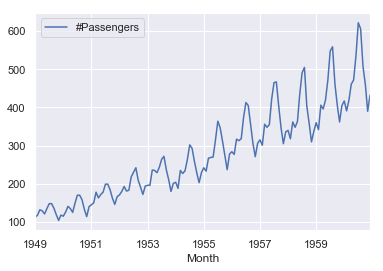

In [5]:
df.plot()

plt.subplots() is a function that returns a tuple containing a figure and axes object(s). Thus when using fig, ax = plt.subplots() you unpack this tuple into the variables fig and ax. Having fig is useful if you want to change figure-level attributes or save the figure as an image file later (e.g. with fig.savefig('yourfilename.png')). You certainly don't have to use the returned figure object but many people do use it later so it's common to see. Also, all axes objects (the objects that have plotting methods), have a parent figure object anyway,

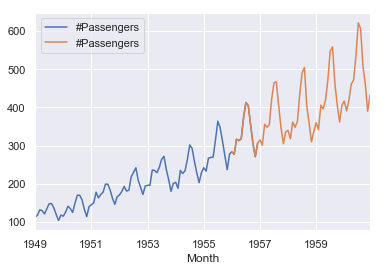

In [22]:
# Split the data into a train and test set
df_train = df.loc[:'1956']
df_test = df.loc['1956':]

# Create an axis
fig, ax = plt.subplots()

# Plot the train and test setsa dn show
df_train.plot(ax=ax)
df_test.plot(ax=ax)
plt.show()

# Stationary

Agumented Dickey fuller test only tests Trend Stationarity 

In [23]:
from statsmodels.tsa.stattools import adfuller
results = adfuller(df['#Passengers'])

In [24]:
print(results)

(0.8153688792060423, 0.9918802434376409, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.6929308390189)


Index 0 - Test Statitic (0.815), the more negative the more stationary. Here it is not stationary
Index 1 - P-value (0.99), p-value > 0.05: Fail to (Do Not) reject the null hypothesis (H0), the data has a unit root and is non-stationary. 

# Lets Make this data Statioanry

In [28]:
df_stationary = df.diff()
df_stationary.head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0


In [30]:
df_stationary.isna().any()

#Passengers    True
dtype: bool

In [31]:
df_stationary.isnull().sum()

#Passengers    1
dtype: int64

In [33]:
df_stationary = df.diff().dropna()

In [34]:
df_stationary.isnull().sum()

#Passengers    0
dtype: int64

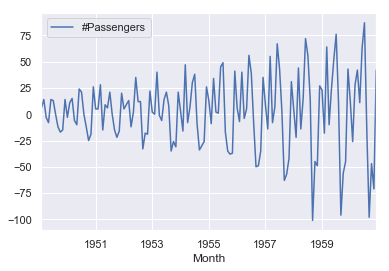

In [35]:
df_stationary.plot()

In [38]:
df_stationary = df.diff().diff().dropna()

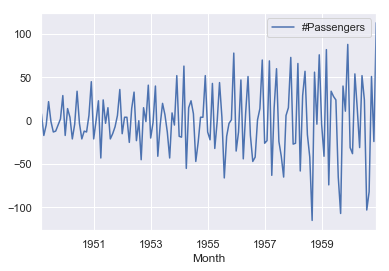

In [39]:
df_stationary.plot()

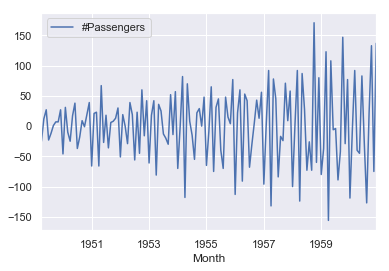

In [40]:
df_stationary = df.diff().diff().diff().dropna()
df_stationary.plot()

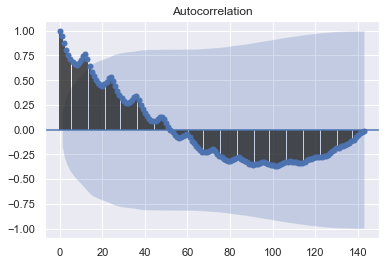

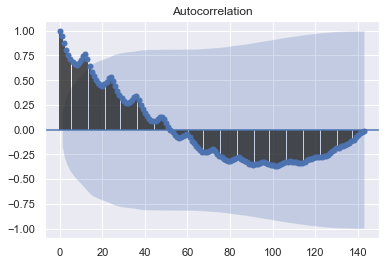

In [91]:
plot_acf(df)

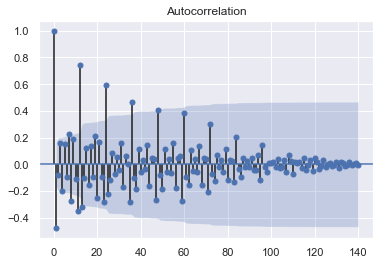

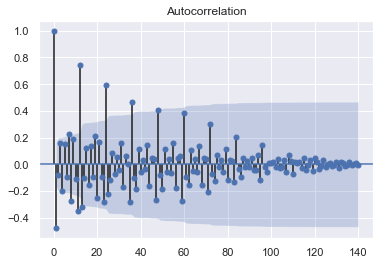

In [43]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_stationary)

# AUTO REGRESSION

In [47]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [50]:
model_ar = AR(df_train)
model_ar_fit = model_ar.fit()

C:\Users\vipatha\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [53]:
predictions = model_ar_fit.predict()

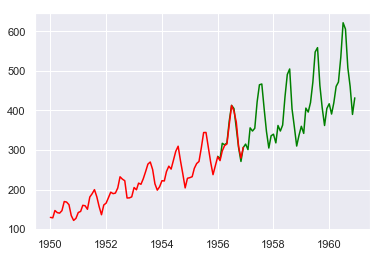

In [55]:
plt.plot(df_test, color='green')
plt.plot(predictions, color = 'red')

# ARIMA

In [56]:
from statsmodels.tsa.arima_model import ARIMA 

In [71]:
# p = predios take for auto regressive model 
# d = integrated order. Howmany times differening is done 
# q = periods or lag in moving avarage 
model_arima = ARIMA(df_train, order = (3,2,1))
model_arima_fit = model_arima.fit()

C:\Users\vipatha\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\vipatha\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [61]:
df_test.size

60

In [94]:
predictions = model_arima_fit.forecast(steps = 60)[0]
predictions

array([331.40822381, 337.6417108 , 332.78520329, 329.60614099,
       331.28428757, 335.24883713, 338.71600974, 341.04998146,
       342.91283128, 344.93033457, 347.21940983, 349.61454238,
       351.97547504, 354.28228357, 356.57576072, 358.88714139,
       361.21939537, 363.56258186, 365.90979409, 368.26071934,
       370.61775633, 372.98242076, 375.35470006, 377.7340205 ,
       380.12005218, 382.51281715, 384.91245155, 387.31902652,
       389.73253267, 392.15293796, 394.58022718, 397.01440346,
       399.4554743 , 401.9034429 , 404.35830834, 406.82006886,
       409.28872381, 411.76427344, 414.24671816, 416.7360581 ,
       419.23229319, 421.73542334, 424.24544853, 426.76236876,
       429.28618407, 431.81689445, 434.35449991, 436.89900044,
       439.45039603, 442.00868669, 444.57387242, 447.14595322,
       449.72492909, 452.31080002, 454.90356603, 457.50322711,
       460.10978325, 462.72323446, 465.34358074, 467.97082209])

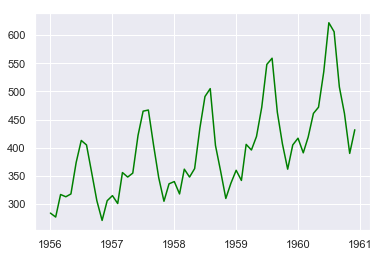

In [86]:
plt.plot(df_test, color='green')

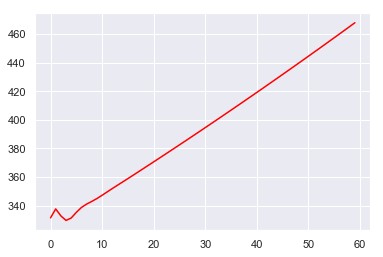

In [95]:
plt.plot(predictions, color = 'red')

In [90]:
model_arima_fit.aic

862.8254003587167